In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
reviews_df=pd.read_csv('data/Reviews.csv')
reviews_df.shape

(3999, 10)

In [8]:
reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,50057,B000ER5DFQ,A1ESDLEDR9Y0JX,A. Spencer,1,2,1,1310256000,the garbanzo beans in it give horrible gas,To be fair only one of my twins got gas from t...
1,366917,B001AIQP8M,A324KM3YY1DWQG,danitrice,0,0,5,1251072000,Yummy Lil' Treasures!!,Just recieved our first order of these (they d...
2,214380,B001E5E1XW,A3QCWO53N69HW3,"M. A. Vaughan ""-_-GOBNOGO-_-""",2,2,5,1276473600,Great Chai,This is a fantastic Chai Masala. I am very pic...
3,178476,B000TIZP5I,AYZ5NG9705AG1,Consumer,0,0,5,1341360000,Celtic Salt worth extra price,Flavorful and has added nutrition! You use le...
4,542504,B000E18CVE,A2LMWCJUF5HZ4Z,"Miki Lam ""mikilam""",8,11,3,1222732800,mixed feelings,I thought this soup tasted good. I liked the t...


In [10]:
reviews_df = reviews_df[['Text','Score']].dropna()

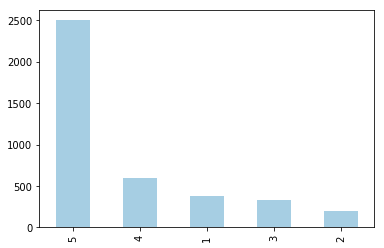

In [11]:
ax=reviews_df.Score.value_counts().plot(kind='bar', colormap='Paired')
plt.show()

In [12]:
reviews_df.Score[reviews_df.Score<=3]=0
reviews_df.Score[reviews_df.Score>=4]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


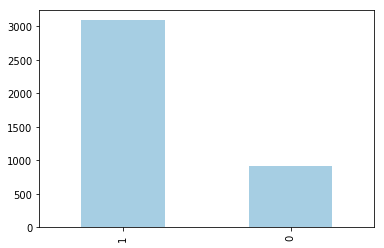

In [15]:
ax=reviews_df.Score.value_counts().plot(kind='bar', colormap='Paired')
plt.show()

In [13]:
reviews_df.head()

,Text,Score
0,To be fair only one of my twins got gas from t...,0
1,Just recieved our first order of these (they d...,1
2,This is a fantastic Chai Masala. I am very pic...,1
3,Flavorful and has added nutrition! You use le...,1
4,I thought this soup tasted good. I liked the t...,0


In [23]:
import spacy
import random
from spacy.training import Example 
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL 

In [25]:
nlp = spacy.load("en_core_web_md") 

config = { 

   "threshold": 0.5, 

   "model": DEFAULT_MULTI_TEXTCAT_MODEL 

} 

textcat = nlp.add_pipe("textcat_multilabel", config=config) 

In [26]:
train_examples = []

for index, row in reviews_df.iterrows():
    text = row["Text"]
    rating = row["Score"]
    label = {"POS": True, "NEG": False} if rating == 1 else {"NEG": True, "POS": False}
    train_examples.append(Example.from_dict(nlp.make_doc(text), {"cats": label}))
    

In [28]:
train_examples[0]

{'doc_annotation': {'cats': {'NEG': True, 'POS': False}, 'entities': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], 'links': {}}, 'token_annotation': {'ORTH': ['To', 'be', 'fair', 'only', 'one', 'of', 'my', 'twins', 'got', 'gas', 'from', 'this', 'but', 'it', 'was', 'horrible', '.', 'Up', 'all', 'night', 'screaming', 'from', 'gas', 'pains', '.', 'Garbanzo', 'beans', 'are', 'not', 'an', 'ideal', 'food', 'for', 'young', 'babies', '.'], 'SPACY': [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, False], 'TAG': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], 'LEMMA': ['', '', '', '', '', '', '', '', ''

In [29]:
textcat.add_label("POS")
textcat.add_label("NEG")
textcat.initialize(lambda: train_examples, nlp=nlp) 

In [30]:
epochs = 2

with nlp.select_pipes(enable="textcat_multilabel"): 

  optimizer = nlp.resume_training() 

  for i in range(epochs): 

    random.shuffle(train_examples) 

    for example in train_examples: 

      nlp.update([example], sgd=optimizer) 

In [31]:
doc2 = nlp("This is the best food I ever ate")

In [32]:
doc2.cats

{'POS': 0.9553419947624207, 'NEG': 0.061326123774051666}

In [33]:
doc3 = nlp("This food is so bad")

In [34]:
doc3.cats

{'POS': 0.21204468607902527, 'NEG': 0.8010350465774536}